06-gradient-descent.ipynb

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('https://bit.ly/fish_csv_data')

X = df.iloc[:, 1:]
y = df.iloc[:,  0]

train_input, test_input, train_target, test_target = train_test_split(
    X, y, random_state=42
)

scaler = StandardScaler()
scaler.fit(train_input)

train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

In [37]:
from sklearn.linear_model import SGDClassifier
# Stochastic Gradient Descent

# 로지스틱 회귀를, 확률론적 경사하강법으로 학습시키겠다.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print('Train =>', sc.score(train_scaled, train_target))
print('Test =>', sc.score(test_scaled, test_target))

Train => 0.773109243697479
Test => 0.775


c:\Users\1-00\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [35]:
sc.partial_fit(train_scaled, train_target)

print('Train =>', sc.score(train_scaled, train_target))
print('Test =>', sc.score(test_scaled, test_target))

Train => 0.8151260504201681
Test => 0.8


In [62]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_scores = []
test_scores = []
classes = np.unique(train_target)

for i in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    s1 = sc.score(train_scaled, train_target)
    s2 = sc.score(test_scaled, test_target)

    train_scores.append(s1)
    test_scores.append(s2)

max(train_scores)
train_scores.index(0.9663865546218487)

270

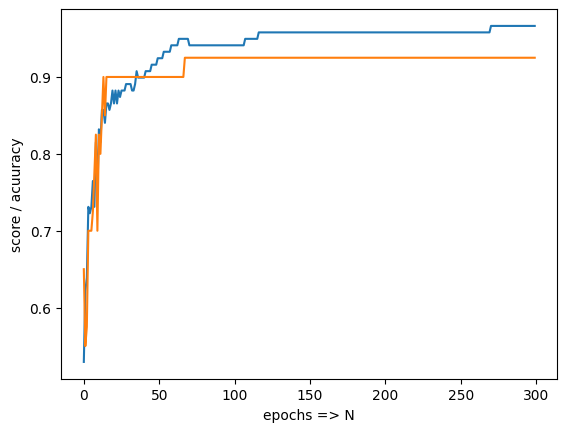

In [57]:
import matplotlib.pyplot as plt
plt.plot(train_scores)
plt.plot(test_scores)
plt.xlabel('epochs => N')
plt.ylabel('score / acuuracy')
plt.show()


In [68]:
#                logistic regression  epochs max                epochs 끝까지 돌려라
sc = SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)
sc.fit(train_scaled, train_target)

print('Train =>', sc.score(train_scaled, train_target))
print('Test =>', sc.score(test_scaled, test_target))

Train => 0.957983193277311
Test => 0.925
